# Unit 5 - Financial Planning


In [7]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [8]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [9]:
# Set current amount of crypto assets
my_btc =1.2
my_eth = 5.3




In [10]:
# Crypto API URLs

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [26]:
btcresponse= requests.get(btc_url).json()
btcresponse["data"]["1"]["quotes"]["USD"]["price"]
ethresposne = requests.get(eth_url).json()
ethresposne["data"]["1027"]["quotes"]["USD"]["price"]

376.34

In [28]:
# Fetch current BTC price

btc_price = float(btcresponse["data"]["1"]["quotes"]["USD"]["price"])

# Fetch current ETH price
eth_price = float(ethresposne["data"]["1027"]["quotes"]["USD"]["price"])
# Compute current value of my crpto
my_btc_value=btc_price*my_btc
my_eth_value=eth_price*my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $13627.36
The current value of your 5.3 ETH is $1994.60


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [35]:
# Current amount of shares
shares_data = {
    "shares":[1.2, 5.3]
}

tickers =["BTC", "ETC"]
#btc = 1.2
#eth = 5.3
#spy = 50
#agg = 200
df_shares =pd.DataFrame(shares_data, index=tickers)

df_shares

,shares
BTC,1.2
ETC,5.3


In [31]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("APCA_API_KEY")
alpaca_secret_key = os.getenv("APCA_API_SECRET")


# Create the Alpaca API object
alpaca = tradeapi.REST(
   alpaca_api_key,
   alpaca_secret_key,
   api_version="v2")

In [32]:
# Format current date as ISO format
today =pd.Timestamp("2020-10-13", tz="America/New_York").isoformat


# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_portfolio =alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
#alpaca.get_barset(["AGG","SPY"],"1D").df

# Preview DataFrame
df_portfolio

AGG                                         \
                             open      high       low    close    volume   
2020-05-26 00:00:00-04:00  117.38  117.4400  117.2400  117.260  10370264   
2020-05-27 00:00:00-04:00  117.50  117.5400  117.3000  117.400   7335948   
2020-05-28 00:00:00-04:00  117.14  117.3500  112.2400  117.330  18488400   
2020-05-29 00:00:00-04:00  117.43  117.7100  117.3200  117.670  16292692   
2020-06-01 00:00:00-04:00  117.35  117.3999  117.2400  117.365  10635820   
...                           ...       ...       ...      ...       ...   
2020-10-08 00:00:00-04:00  117.67  117.7100  117.5900  117.690   3580248   
2020-10-09 00:00:00-04:00  117.65  117.7400  117.5000  117.705   2750029   
2020-10-12 00:00:00-04:00  117.85  117.9400  117.7700  117.930   2770157   
2020-10-13 00:00:00-04:00  118.01  118.0700  117.9294  118.010   3250338   
2020-10-14 00:00:00-04:00  118.10  118.1100  117.9850  118.045   3015275   

                              SPY                                        
                             open      high     low    close     volume  
2020-05-26 00:00:00-04:00  301.93  302.1900  298.69  299.150   80281181  
2020-05-27 00:00:00-04:00  302.12  303.5700  296.87  303.480   92140472  
2020-05-28 00:00:00-04:00  304.65  306.8400  302.24  302.960   80456712  
2020-05-29 00:00:00-04:00  302.46  304.9600  299.47  304.160  101356845  
2020-06-01 00:00:00-04:00  303.62  306.2050  303.06  305.580   46186733  
...                           ...       ...     ...      ...        ...  
2020-10-08 00:00:00-04:00  342.85  343.8500  341.86  343.730   35858727  
2020-10-09 00:00:00-04:00  345.56  347.3500  344.89  346.840   45969566  
2020-10-12 00:00:00-04:00  349.59  354.0200  349.06  352.430   61163344  
2020-10-13 00:00:00-04:00  352.28  352.4651  349.09  350.150   62272512  
2020-10-14 00:00:00-04:00  350.75  351.9300  347.14  348.885   40780327  

[100 rows x 10 columns]

In [37]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
df_closing_prices = pd.DataFrame()
df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]


agg_close_price= df_closing_prices["AGG"][-1]
spy_close_price= df_closing_prices["SPY"][-1]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.045
Current SPY closing price: $348.885


In [40]:
# Compute the current value of shares
my_agg = 200
my_spy=50

my_spy_value=my_spy*spy_close_price
my_agg_value=my_agg*agg_close_price

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $17444.25
The current value of your 200 AGG shares is $23609.00


### Savings Health Analysis

In [52]:
# Set monthly household income
monthly_income = 12000

data=[my_spy_value+my_agg_value, my_btc_value+ my_eth_value]

# Create savings DataFrame
df_savings=pd.DataFrame(data,columns=["amount"] ,index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,41053.250
shares,15621.958


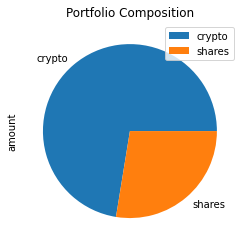

In [50]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Portfolio Composition")

In [57]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
ttl_savings=df_savings["amount"].sum()

# Validate saving health
if ttl_savings > emergency_fund: 
    print("Congratulating the person for having enough money in this   fund")
elif ttl_savings == emergency_fund:
    print("congratulating the person on reaching this financial goal")
elif  ttl_savings < emergency_fund:
    print("yopui are this short this much"+ emergency_fund-ttl_savings)   

Congratulating the person for having enough money in this   fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [58]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [62]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ["SPY","AGG"]


df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Display sample data
df_ticker.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                              SPY                                     
                             open    high     low   close     volume  
2015-08-07 00:00:00-04:00  208.16  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  209.28  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  208.98  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  207.11  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  208.73  209.55  208.01  208.63   77197796

In [78]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

num_sims = 1
MC_even_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.50,.50],
    num_simulation = num_sims,
    num_trading_days = 252*30
)


In [64]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [65]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.


,0
0,1.000000
1,0.999752
2,1.001501
3,1.002484
4,0.987932
...,...
7556,5.087302
7557,5.057167
7558,5.094161
7559,5.082971


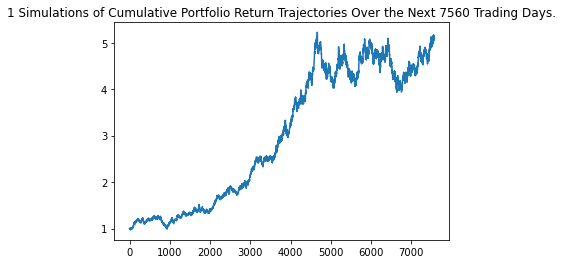

In [66]:
# Plot simulation outcomes
MC_even_dist.plot_simulation()

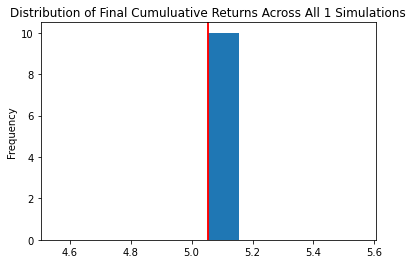

In [67]:
# Plot probability distribution and confidence intervals
MC_even_dist.plot_distribution()

### Retirement Analysis

In [74]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_even_dist.summarize_cumulative_return()
# Print summary statistics
stat=MC_even_dist.summarize_cumulative_return()
print (stat)

count           1.000000
mean            5.054783
std                  NaN
min             5.054783
25%             5.054783
50%             5.054783
75%             5.054783
max             5.054783
95% CI Lower    5.054783
95% CI Upper    5.054783
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [76]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
even_tbl = MC_even_dist.summarize_cumulative_return()

ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $101095.66 and $101095.66


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $68909.24 and $804316.75


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [83]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
num_sims = 10
MC_dist = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.50,.50],
    num_simulation = num_sims,
    num_trading_days = 252*5
)
MC_dist.portfolio_data.head()

AGG                                        \
                             open      high      low   close     volume   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167.0   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778.0   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907.0   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979.0   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [84]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.


,0,1,2,3,4,5,6,7,8,9
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006495,1.005103,0.988314,1.005028,1.004289,0.997888,1.004962,1.004471,1.015387,1.006319
2,1.000260,1.005369,0.994709,1.000477,0.999456,0.986259,1.011594,1.001289,1.012318,1.008424
3,1.001646,1.010153,1.001308,1.009276,1.000498,0.988228,1.015414,0.993016,1.015574,1.019494
4,0.995372,1.010932,1.010406,1.006931,1.002586,0.987073,1.019646,0.996848,1.016901,1.022000
...,...,...,...,...,...,...,...,...,...,...
1256,1.397780,1.544281,1.418073,1.422965,1.272988,1.048406,1.397140,1.547647,1.440332,1.704743
1257,1.393534,1.562735,1.423276,1.428325,1.268736,1.039710,1.396686,1.529190,1.443488,1.699901
1258,1.388214,1.546411,1.424007,1.436536,1.261041,1.030335,1.387862,1.525242,1.444702,1.704133
1259,1.394911,1.558789,1.432743,1.433698,1.256213,1.028060,1.388204,1.533503,1.437234,1.699510


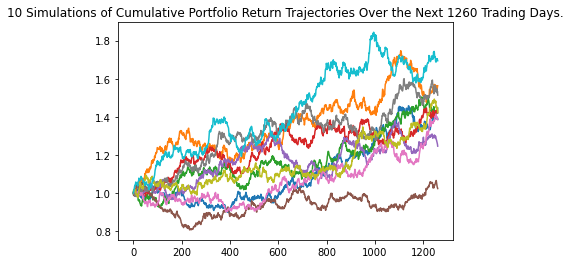

In [85]:
# Plot simulation outcomes
dist_line_plot = MC_dist.plot_simulation()

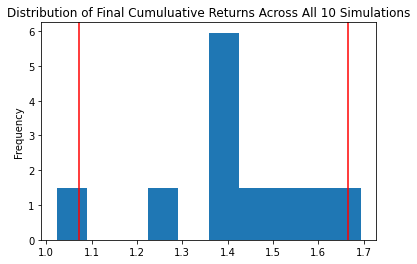

In [86]:
# Plot probability distribution and confidence intervals
dist_line_plot = MC_dist.plot_distribution()

In [90]:
# Fetch summary statistics from the Monte Carlo simulation results
dist_tbl = MC_dist.summarize_cumulative_return()

# Print summary statistics
print(dist_tbl)

count           10.000000
mean             1.410154
std              0.180899
min              1.023021
25%              1.385353
50%              1.422023
75%              1.496895
max              1.694572
95% CI Lower     1.073138
95% CI Upper     1.664871
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $55713.36 and $91030.38


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997817,0.998428,1.000816,1.000202,1.002120,0.998788,1.004226,1.004250,1.001431,1.000740,...,0.995519,1.001253,1.000492,0.994026,1.006129,1.002356,1.005233,0.999769,1.002106,1.003746
2,0.994703,0.996223,1.001987,0.998816,1.002372,0.996708,1.009074,1.006986,1.006219,0.995591,...,0.991815,1.001091,1.003774,0.989341,1.007530,1.009809,1.007273,0.999666,1.006340,0.998303
3,0.994115,0.993375,0.992622,1.001069,0.999700,1.000123,1.011610,1.009254,1.012194,0.998619,...,0.992699,1.003085,1.005997,0.991536,1.004239,1.010765,1.009501,0.999652,1.011737,0.998762
4,0.999040,0.997821,0.992272,0.999767,1.000459,1.006178,1.008906,1.009897,1.014282,0.995619,...,0.997683,1.007825,1.007858,0.991188,1.009171,1.009303,1.008223,1.003270,1.014350,1.001691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.164254,1.246948,1.441080,1.685210,1.702114,1.474774,1.535126,1.288182,1.138653,1.500977,...,1.367442,1.357662,1.661583,1.348599,1.649220,1.782632,1.450872,1.701338,1.199957,1.171159
2517,2.169555,1.246315,1.436260,1.685058,1.697652,1.479128,1.536203,1.288485,1.144082,1.498097,...,1.366833,1.360457,1.672969,1.351751,1.646287,1.781356,1.459438,1.695322,1.197466,1.171882
2518,2.169089,1.243387,1.426446,1.685480,1.714264,1.479079,1.537777,1.289258,1.140795,1.496271,...,1.368088,1.357853,1.662915,1.354957,1.637911,1.781046,1.451367,1.695901,1.201111,1.172847
2519,2.170695,1.238881,1.419187,1.670521,1.720418,1.478161,1.544292,1.296500,1.137510,1.499085,...,1.370125,1.359697,1.664317,1.352170,1.633762,1.778638,1.443413,1.699061,1.191529,1.166331


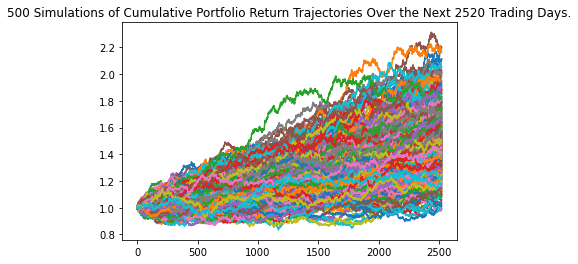

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

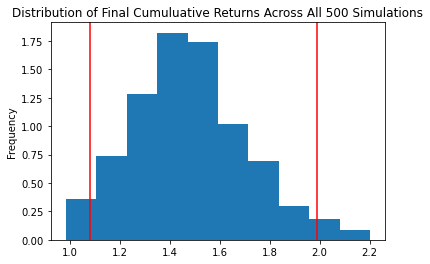

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.477364
std               0.230147
min               0.984413
25%               1.319127
50%               1.468676
75%               1.613270
max               2.202006
95% CI Lower      1.083048
95% CI Upper      1.990417
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $64982.9 and $119425.0
